![](../assets/ITDP_PrestigeLogo.png)

## Pollution Level Analysis
etc.

- __Datos recibidos:__ [Meteorología,](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zw==)
[Contamianción](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zg==)
- __Responsable:__ Daniel Bustillos
- __Contacto:__  juandaniel.bucam@gmail.com
___

In [567]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn

Read processed pollution an weather data from 2015 to 2020 (may):

In [568]:
df_15 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2015.csv")
df_15 = df_15[df_15['mes']<5]

df_16 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2016.csv")
df_16 = df_16[df_16['mes']<5]

df_17 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2017.csv")
df_17 = df_17[df_17['mes']<5]

df_18 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2018.csv")
df_18 = df_18[df_18['mes']<5]

df_19 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2019.csv")
df_19 = df_19[df_19['mes']<5]

df_20 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2020.csv")
df_20 = df_20[df_20['mes']<5]

Juntar las 5 tablas en una

In [569]:
df_append = pd.DataFrame(columns=df_19.columns.tolist())#change to 2019
df_append = df_append.append(df_15, ignore_index=True,sort=True)
df_append = df_append.append(df_16, ignore_index=True,sort=True)
df_append = df_append.append(df_17, ignore_index=True,sort=True)
df_append = df_append.append(df_18, ignore_index=True,sort=True)
df_append = df_append.append(df_19, ignore_index=True,sort=True)
df_append = df_append.append(df_20, ignore_index=True,sort=True)
del df_15, df_16, df_17, df_18, df_19, df_20

Arreglar fechas

In [570]:
df_append['año'] = df_append['fecha'].str[:4]

df_append['fecha'] = pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M:%S')

In [571]:
df_append['fecha'] = pd.to_datetime(df_append['fecha']) - pd.to_timedelta(7, unit='d')

Obtener semana del año

In [572]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

Promediar

In [573]:
df_append

,CO,NO,NO2,NOX,O3,PBa,PM10,PM2.5,PMCO,RH,...,TMP,WDR,WSP,dia,fecha,hora,id_station,mes,año,week
0,0.6,14.0,21.0,35.0,4.0,NaN,84.0,NaN,NaN,82.0,...,9.0,358.0,1.8,1,2014-12-25 01:00:00,1,ACO,1,2015,1
1,1.2,3.0,58.0,61.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,180.0,1.3,1,2014-12-25 01:00:00,1,AJM,1,2015,1
2,NaN,NaN,NaN,NaN,3.0,NaN,86.0,NaN,NaN,78.0,...,10.1,150.0,0.7,1,2014-12-25 01:00:00,1,CHO,1,2015,1
3,1.7,11.0,51.0,62.0,14.0,NaN,NaN,NaN,NaN,75.0,...,10.1,204.0,1.4,1,2014-12-25 01:00:00,1,CUA,1,2015,1
4,NaN,74.0,22.0,96.0,3.0,NaN,186.0,NaN,NaN,95.0,...,6.1,238.0,0.3,1,2014-12-25 01:00:00,1,CUT,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553933,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,2020-03-25 00:00:00,0,HGM,4,2020,14
553934,0.1,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1,2020-03-25 00:00:00,0,IZT,4,2020,14
553935,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,2020-03-25 00:00:00,0,LLA,4,2020,14
553936,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1,2020-03-25 00:00:00,0,LPR,4,2020,14


In [574]:
df_day = df_append.groupby(['fecha', 'año'])[["PM10", 'PM2.5', "O3", 'NO2']].mean().reset_index(drop=False)

## Descripción General
### Distribución de valores
#### PM10


Text(0, 0.5, 'Semana del Año')

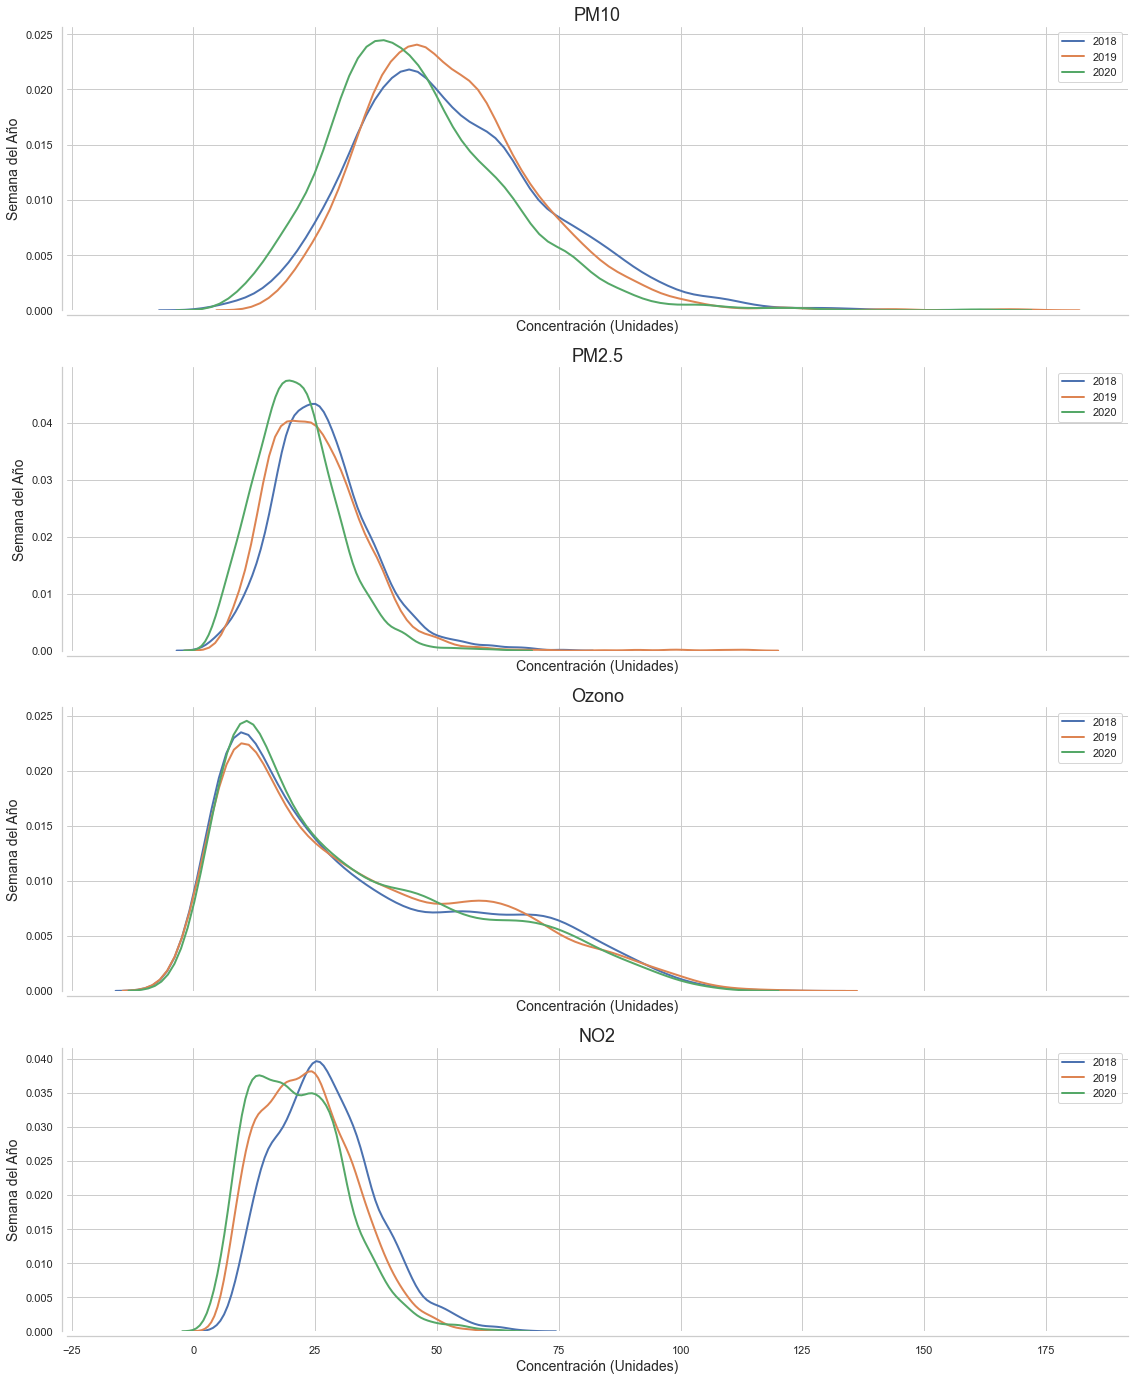

In [577]:
f, axes = plt.subplots(4 ,figsize=(19, 24), sharex=True)
anios = [2018,2019,2020]


[sns.distplot(df_day[df_day["año"]==anio]['PM10'], label=str(anio), ax=axes[0], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[0].set_title(contaminante, fontsize=18)
axes[0].set_xlabel('Concentración (Unidades)', fontsize=14)
axes[0].set_ylabel('Semana del Año', fontsize=14)
######

[sns.distplot(df_day[df_day["año"]==anio]['PM2.5'], label=str(anio), ax=axes[1], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[1].set_title("PM2.5", fontsize=18)
axes[1].set_xlabel('Concentración (Unidades)', fontsize=14)
axes[1].set_ylabel('Semana del Año', fontsize=14)
######

[sns.distplot(df_day[df_day["año"]==anio]['O3'], label=str(anio), ax=axes[2], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[2].set_title("Ozono", fontsize=18)
axes[2].set_xlabel('Concentración (Unidades)', fontsize=14)
axes[2].set_ylabel('Semana del Año', fontsize=14)
######


[sns.distplot(df_day[df_day["año"]==anio]['NO2'], label=str(anio), ax=axes[3], hist=False, norm_hist=False, kde=True) for anio in anios]
sns.despine()
sns.despine(offset=5, trim=False)
axes[3].set_title("NO2", fontsize=18)
axes[3].set_xlabel('Concentración (Unidades)', fontsize=14)
axes[3].set_ylabel('Semana del Año', fontsize=14)
######

## Obtener promedio por semana del año (considerando todas las estaciones)

In [578]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

In [580]:
def q1(x):
    return x.quantile(0.1)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.9)

df_pm10 = df_append.groupby(['week', 'año'])[["PM10"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm10.columns = ['week', 'año', 'PM10_p1', 'PM10_mean', 'PM10_p9']

df_pm25 = df_append.groupby(['week', 'año'])[["PM2.5"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_pm25.columns = ['week', 'año', 'PM25_p1', 'PM25_mean', 'PM25_p9']

df_O3 = df_append.groupby(['week', 'año'])[["O3"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_O3.columns = ['week', 'año', 'O3_p1', 'O3_mean', 'O3_p9']

df_NO2 = df_append.groupby(['week', 'año'])[["NO2"]].agg([q1,'mean', q3]).reset_index(drop=False)
df_NO2.columns = ['week', 'año', 'NO2_p1', 'NO2_mean', 'NO2_p9']

filtrar primeras 18 semanas

In [582]:
df_pm10 = df_pm10[df_pm10['week']<= 18]
df_pm25 = df_pm25[df_pm25['week']<= 18]
df_O3 = df_O3[df_O3['week']<= 18]
df_NO2 = df_NO2[df_NO2['week']<= 18]

___

### Resultados

config

In [583]:
sns.set_style("whitegrid")
a4_dims = (11.7, 8.27)
sns.set(rc={"lines.linewidth": 2})
sns.set_style("whitegrid")

years_to_plot = [2018,2019,2020]

In [586]:
def plot(contaminante, df):
    
    # plot
    f, axes = plt.subplots(3 ,figsize=(14, 14), sharex=True)

    
    contaminante_mean = contaminante + "_mean"
    contaminante_p1 = contaminante + "_p1"
    contaminante_p9 = contaminante + "_p9"
    
    

    sns.lineplot(x="week", y=contaminante_mean, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[0], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[0].set_title(contaminante + ' promedio por Semana', fontsize=18)
    axes[0].set_ylabel('Concentración (Unidades)', fontsize=14)
    axes[0].set_xlabel('Semana del Año', fontsize=14)
    ######
    sns.lineplot(x="week", y=contaminante_p1, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[1], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[1].set_title(contaminante + ' (Percentil 10) por Semana', fontsize=18)
    axes[1].set_ylabel('Concentración (Unidades)', fontsize=14)
    axes[1].set_xlabel('Semana del Año', fontsize=14)
    #####

    sns.lineplot(x="week", y=contaminante_p9, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[2], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[2].set_title(contaminante + ' (Percentil 90) por Semana', fontsize=18)
    axes[2].set_ylabel('Concentración (Unidades)', fontsize=14)
    axes[2].set_xlabel('Semana del Año', fontsize=14)
    #####

    sns.lineplot(x="week", y=contaminante_p9, hue='año', data=df[df['año'].isin(years_to_plot)],
                 ax=axes[2], palette=sns.color_palette("deep",len(years_to_plot)))
    sns.despine()
    sns.despine(offset=5, trim=False)
    axes[2].set_title(contaminante + ' (Percentil 90) por Semana', fontsize=18)
    axes[2].set_ylabel('Concentración (Unidades)', fontsize=14)
    axes[2].set_xlabel('Semana del Año', fontsize=14)
    #####

    sns.despine(left=True)
    
    
    if contaminante == 'PM25':
        contaminante = 'PM2.5'
        

    a = pd.pivot_table(df_append, values=contaminante, columns='año', index='week', aggfunc='mean').reset_index(drop=True)
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(a, annot=True, linewidths=.5, ax=ax)
    ax.set_title(contaminante + ' promedio por Semana', fontsize=14)
    ax.set_ylabel('Semana', fontsize=10)
    ax.set_xlabel('Año', fontsize=10)

## PM10

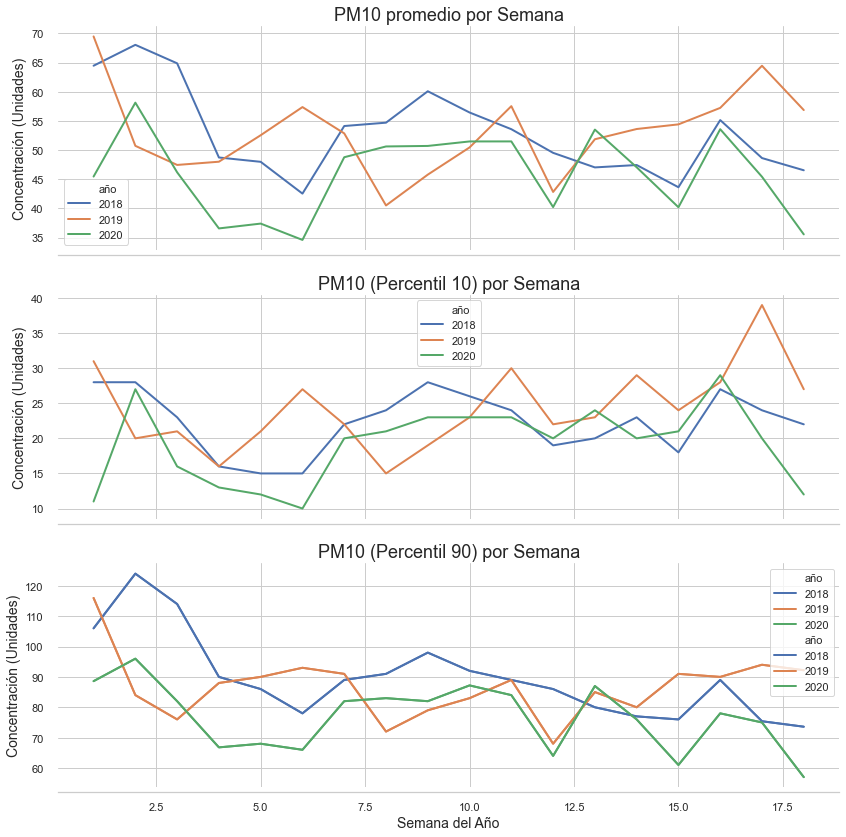

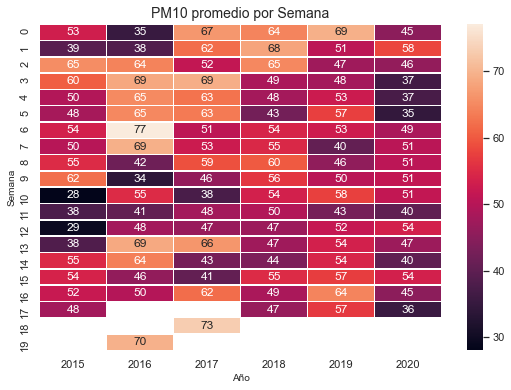

In [587]:
df = df_pm10
contaminante = 'PM10'
plot(contaminante='PM10', df=df_pm10)

## PM2.5

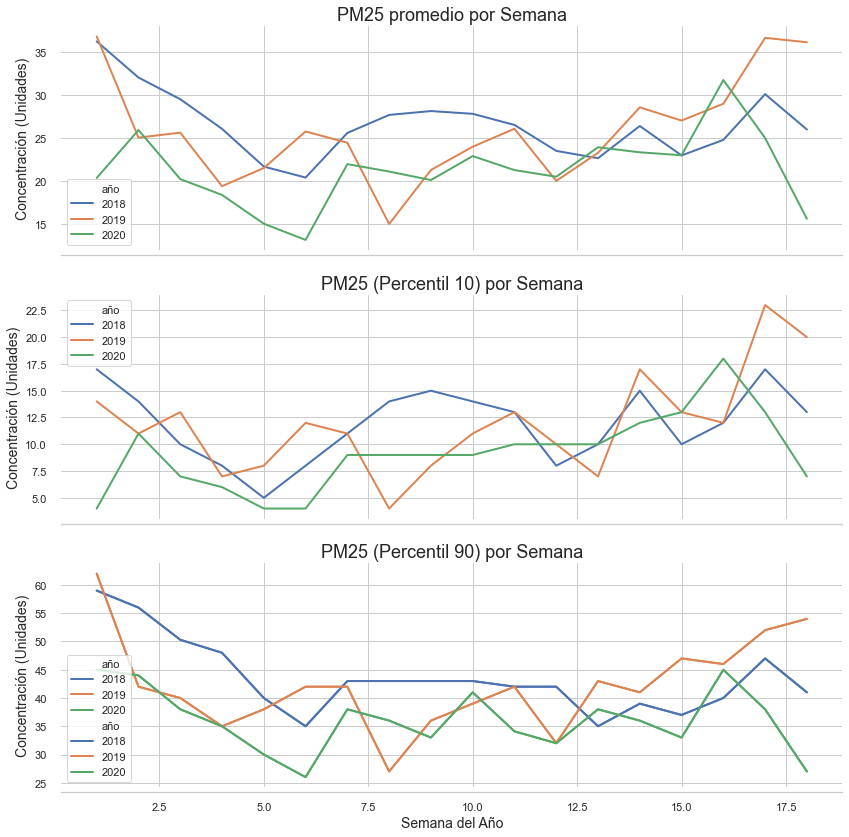

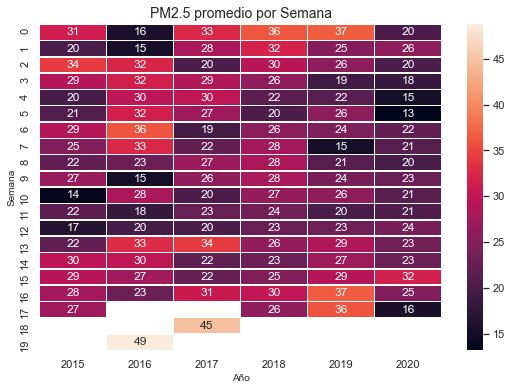

In [588]:
plot(contaminante='PM25', df=df_pm25)

Text(0.5, 30.5, 'Año')

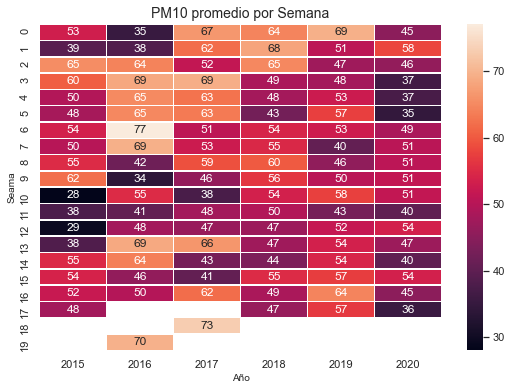

In [589]:
a = pd.pivot_table(df_append, values=contaminante, columns='año', index='week', aggfunc='mean').reset_index(drop=True)
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(a, annot=True, linewidths=.5, ax=ax)
ax.set_title(contaminante + ' promedio por Semana', fontsize=14)
ax.set_ylabel('Seama', fontsize=10)
ax.set_xlabel('Año', fontsize=10)

## Ozono

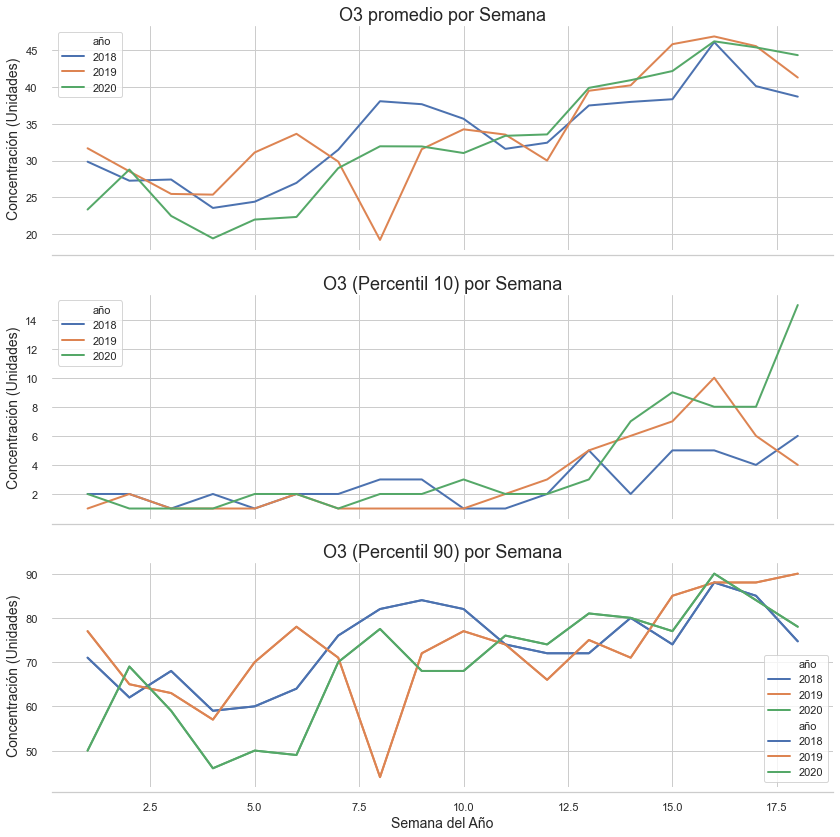

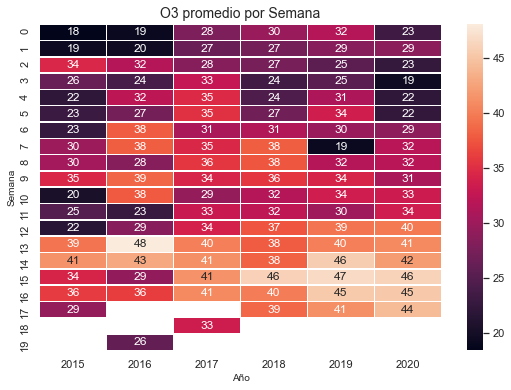

In [590]:
plot(contaminante='O3', df=df_O3)

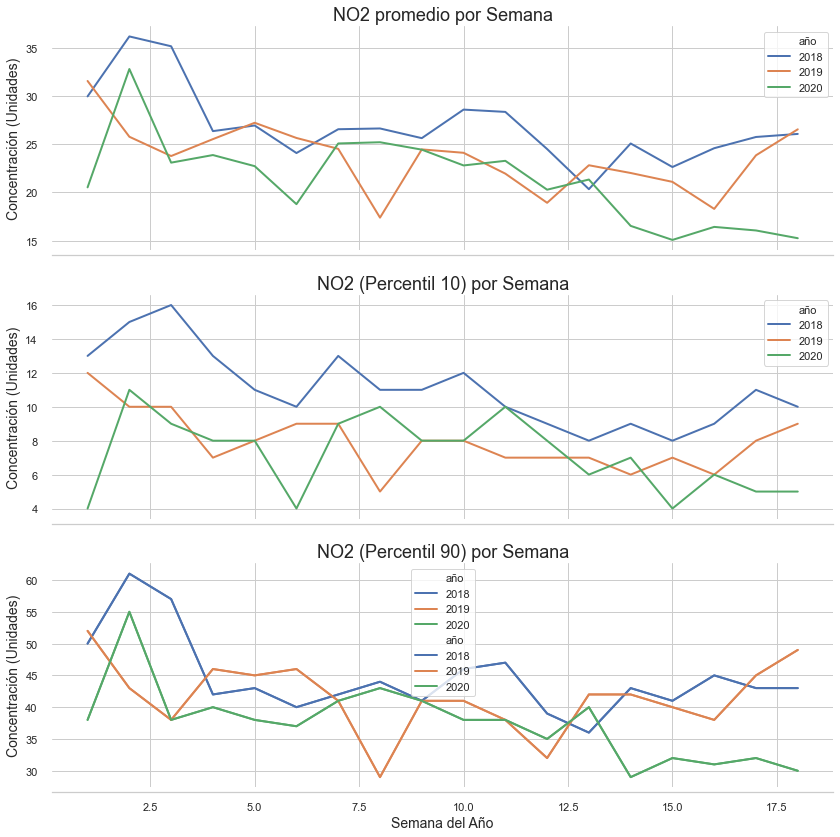

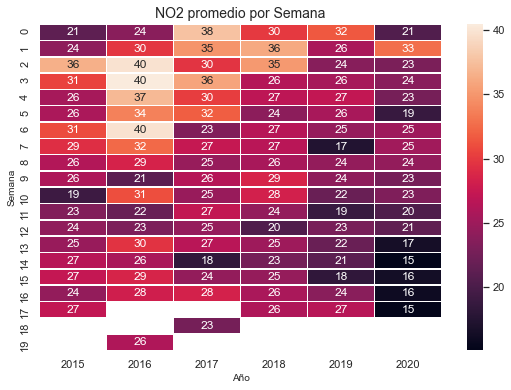

In [591]:
plot(contaminante='NO2', df=df_NO2)